In [1]:
import warnings
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from game import Game
from models import Player, Land, MockPlayer
from utils.fc import get_df_over_increase, create_mock_game, simulation, merge_dfs
from utils.mpl import plot_scatter

In [2]:
df = simulation(my_defense_bonus=0, my_attack_bonus=65, enemy_defense_bonus=13.8,group=False)
df1 = simulation(my_defense_bonus=0, my_attack_bonus=65, enemy_defense_bonus=13.8,hero='kongz', rarity='usual', group=False)
df2 = simulation(my_defense_bonus=0, my_attack_bonus=65, enemy_defense_bonus=13.8,hero='kongz', rarity='unusual', group=False)
df3 = simulation(my_defense_bonus=0, my_attack_bonus=65, enemy_defense_bonus=13.8,hero='kongz', rarity='rare', group=False)
df4 = simulation(my_defense_bonus=0, my_attack_bonus=65, enemy_defense_bonus=13.8,hero='kongz', rarity='epic', group=False)
df = merge_dfs(dfs=[df, df1, df2, df3, df4], column='goldz', names = ['No Hero', 'Usual', 'Unusual', 'Rare', 'Epic'], pk='day', limits=(10,15))
df

,day,No Hero,Usual,Unusual,Rare,Epic
10,11.0,5.46,5.76,5.84,5.90,6.36
11,12.0,5.40,5.74,5.84,6.06,6.28
12,13.0,5.62,5.76,5.84,6.10,6.32
13,14.0,5.36,5.92,6.14,6.02,6.22
14,15.0,5.44,5.86,5.94,5.94,6.30


Text(0.5, 1.0, 'Kongz Goldz average at day 11 - 15')

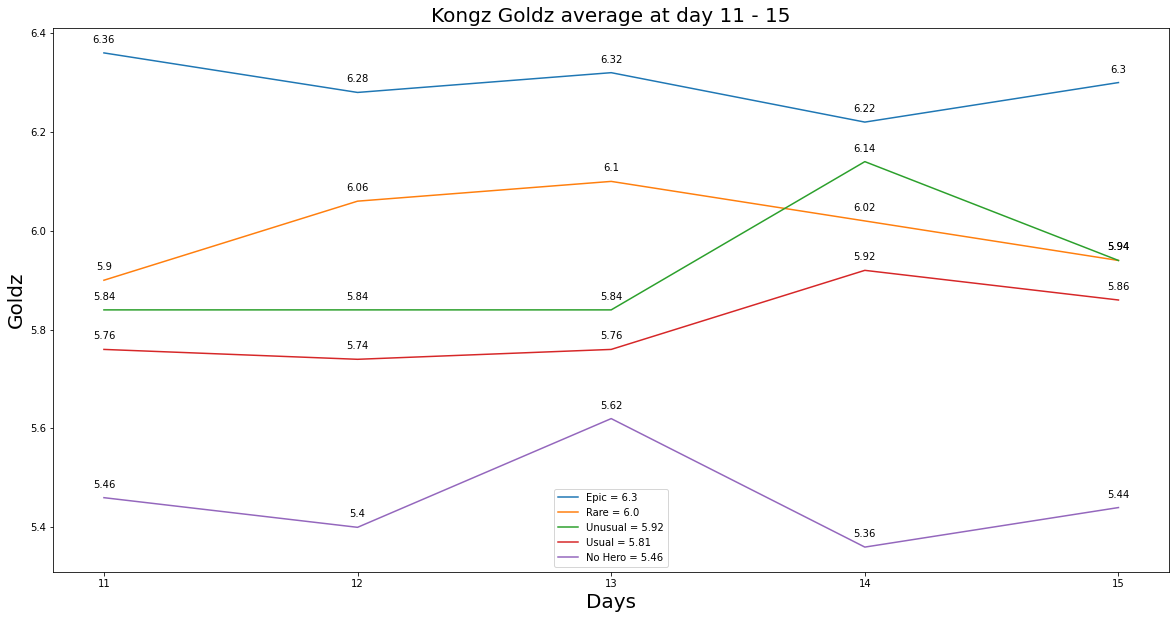

In [3]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(df.day, df.Epic, label=f'Epic = {round(df.Epic.mean(),2)}')
ax.plot(df.day, df.Rare, label=f'Rare = {round(df.Rare.mean(),2)}')
ax.plot(df.day, df.Unusual, label=f'Unusual = {round(df.Unusual.mean(),2)}')
ax.plot(df.day, df.Usual, label=f'Usual = {round(df.Usual.mean(),2)}')
ax.plot(df.day, df['No Hero'], label=f'No Hero = {round(df["No Hero"].mean(),2)}')

plot_scatter(df.day ,df.Usual)
plot_scatter(df.day,df.Unusual)
plot_scatter(df.day ,df.Rare)
plot_scatter(df.day ,df.Epic)
plot_scatter(df.day ,df['No Hero'])

ax.set_xlabel('Days',fontsize=20)
ax.set_ylabel('Goldz',fontsize=20)
ax.legend(prop={'size': 10})
plt.xticks(df.day)
ax.set_title(f"Kongz Goldz average at day 11 - 15", fontsize=20)
